## Data augmentation
* It is the method of creating new data in different orientations
* It prevents overfitting 
* Rotation, swirling, warping, addition of noise to the image etc. are different type of Data augmentation methods

In [35]:
# import warnings
# warnings.filterwarnings("ignore")

import skimage
from skimage import data
from skimage import io

import matplotlib.pyplot as plt
import numpy as np

## Resizing
It is necessary to convert all images in to similar sizes and that can be achieved by `skimage.transform.resize`

### Loading an image

In [2]:
cat = io.imread('datasets/images/cat.jpg')

https://www.pexels.com/photo/adorable-animal-blur-cat-617278/

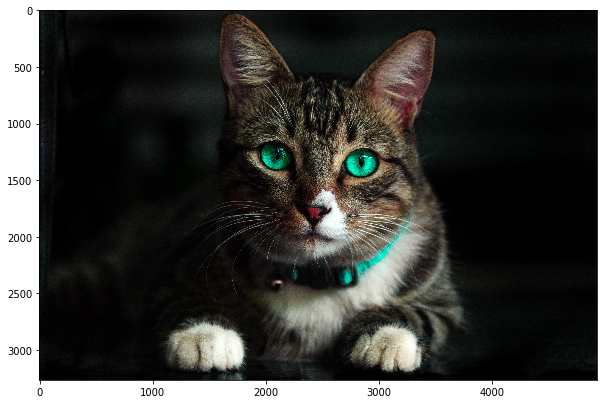

In [16]:
plt.figure(figsize=(10, 10))  

plt.imshow(cat);

In [17]:
cat.shape

(3264, 4928, 3)

### Resizing 
As all the images in a dataset are of different sizes, so one particular size is decided and applied on every image in the dataset

In [18]:
from skimage.transform import resize

Anti-aliasing is true by default to minimize the distortion effects of resizing

In [19]:
cat_resized = resize(cat, (480, 480), anti_aliasing=True)
cat_resized.shape

(480, 480, 3)

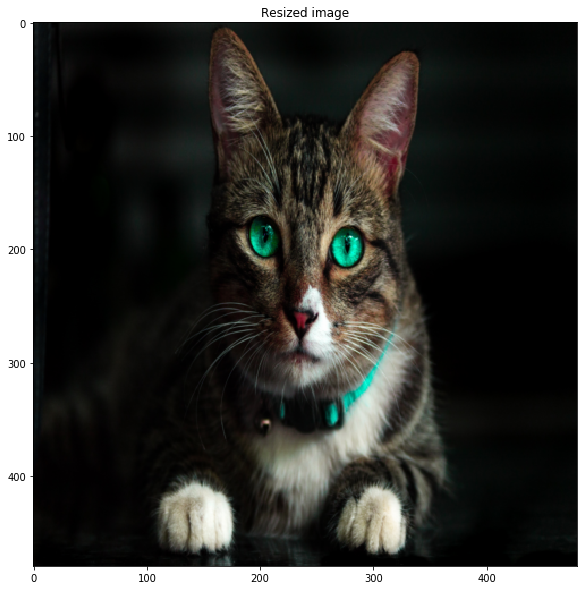

In [20]:
plt.figure(figsize = (10, 10)) 
plt.imshow(cat_resized) 
plt.title('Resized image');

In [21]:
aspect_ratio_original = cat.shape[1] / float(cat.shape[0])
aspect_ratio_resized = cat_resized.shape[1] / float(cat_resized.shape[0])

print("Original aspect ratio: ", aspect_ratio_original)
print("Resized aspect ratio: ", aspect_ratio_resized)

Original aspect ratio:  1.5098039215686274
Resized aspect ratio:  1.0


### Rescaling preserving aspect ratio

In [22]:
from skimage.transform import rescale

In [23]:
cat_rescaled = rescale(cat_resized, (1.0, aspect_ratio_original), anti_aliasing=False)
cat_rescaled.shape

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


(480, 725, 3)

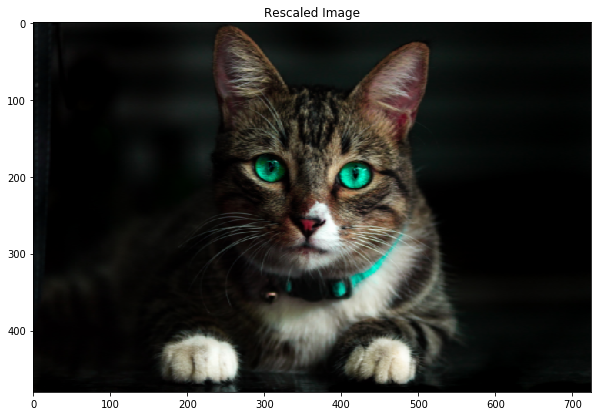

In [24]:
plt.figure(figsize=(10, 10)) 
plt.title("Rescaled Image")
plt.imshow(cat_rescaled);

In [25]:
aspect_ratio_rescaled = cat_rescaled.shape[1] / float(cat_rescaled.shape[0])

print("Rescaled aspect ratio: ", aspect_ratio_rescaled);

Rescaled aspect ratio:  1.5104166666666667


### Upscaling

Consider a case where your images are tiny to work with and your ML model requires you to use larger images. Scikit-image allows you to perform this transform using some default interpolation values.

Let's take an microscopic image of blood cells. It's just 128x128 but our ML model needs 224x224 images.


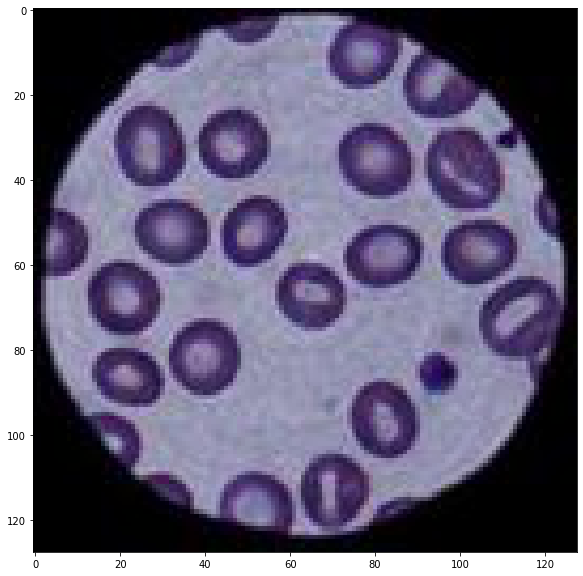

In [79]:
img_tiny = skimage.img_as_float(skimage.io.imread(
    "datasets/images/blood_cells128x128.jpg")).astype(np.float32)

plt.figure(figsize=(10, 10))
plt.imshow(img_tiny);

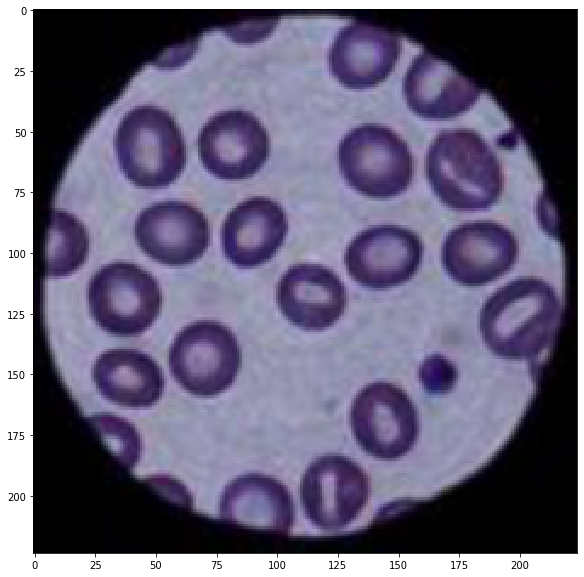

In [80]:
img_tiny_upscaled = skimage.transform.resize(img_tiny, (224, 224))

plt.figure(figsize=(10, 10))
plt.imshow(img_tiny_upscaled);

## Cropping
* Due to different size variations, it is not possible to resize all the images by conserving all the details of the image. In that case the center portion of the image is being cropped where the maximum characteristics of the image lies.
* More over cropping center after resizing preservers more feature

In [26]:
def crop_center(img, cropx, cropy):
    height, width, channels = img.shape
    
    start_width = width // 2 - (cropx // 2)
    start_height = height // 2 - (cropy // 2)
    
    return img[start_height:start_height + cropy, start_width:start_width + cropx]

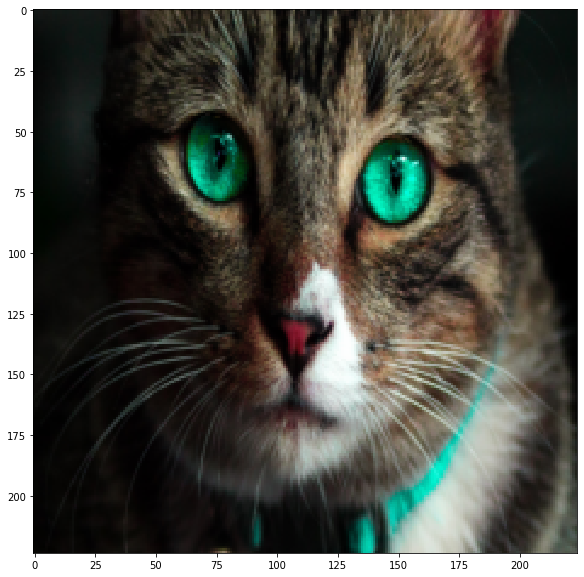

In [28]:
cat_cropped = crop_center(cat_resized, 224, 224)

plt.figure(figsize = (10, 10)) 
plt.imshow(cat_cropped);

### Rotation of image

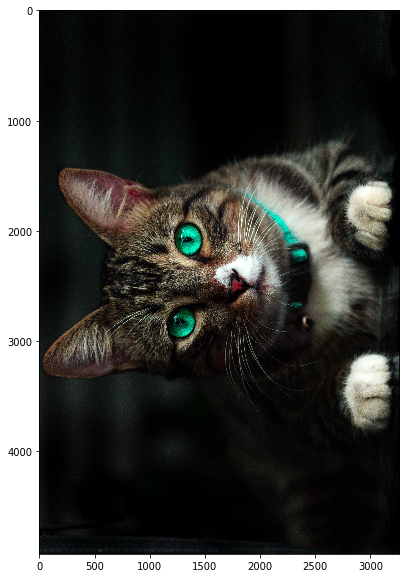

In [29]:
cat_rotated_90 = np.rot90(cat)

plt.figure(figsize=(10, 10))
plt.imshow(cat_rotated_90);

### Flipping the image or creating mirror image

https://pixabay.com/en/book-printing-letters-shield-3218480/

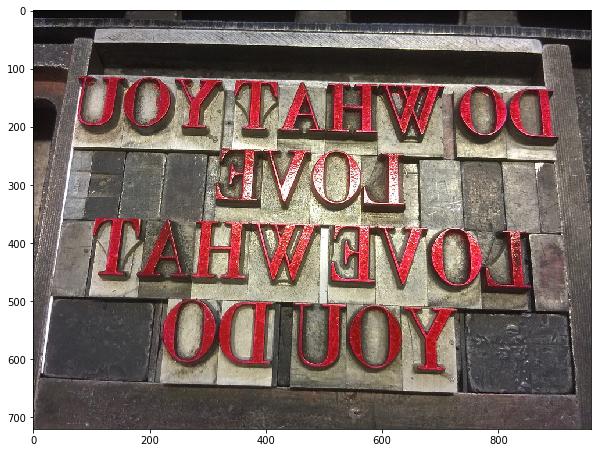

In [43]:
img_mirror = skimage.img_as_float(skimage.io.imread(
    'datasets/images/book-mirrored.jpg')).astype(np.float32)

plt.figure(figsize=(10, 10))
plt.imshow(img_mirror);

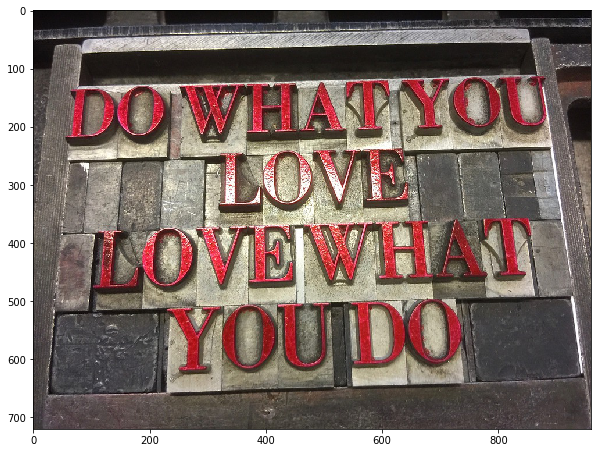

In [44]:
image_mirror_fliplr = np.fliplr(img_mirror)

plt.figure(figsize=(10, 10))
plt.imshow(image_mirror_fliplr);

### Warping
Image warping is the process of digitally manipulating an image such that any shapes portrayed in the image have been significantly distorted.

`skimage.transfor.warp` warps an image according to a given coordinate transformation.

In [31]:
from skimage.transform import warp, SimilarityTransform

In [67]:
tform = SimilarityTransform(scale=1.5, rotation=120,
                            translation=(100, 100))

rotated = warp(cat, tform)

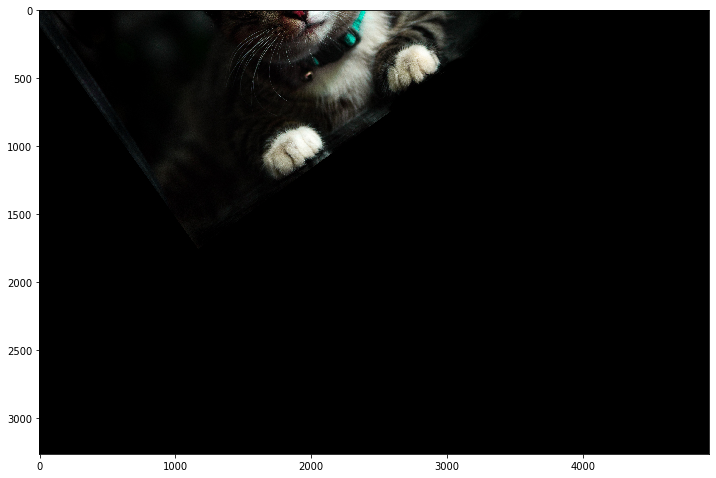

In [68]:
plt.figure(figsize=(12, 10))
plt.imshow(rotated);

### Swirl
Image swirling is a non-linear image deformation that creates a whirlpool effect.

In [69]:
from skimage.transform import swirl

In [70]:
cat_swirled = swirl(cat, rotation=0,
                    strength=60,
                    radius=700,
                    mode='constant')

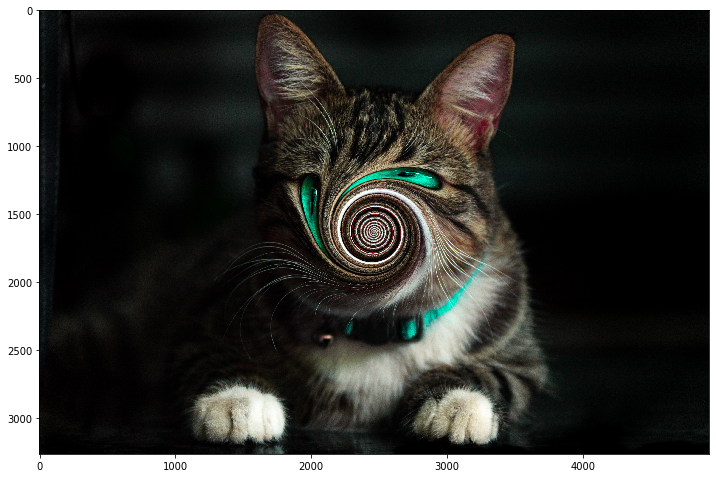

In [71]:
plt.figure(figsize=(12, 10))
plt.imshow(cat_swirled);

## Pooling
https://scikit-image.org/docs/dev/auto_examples/numpy_operations/plot_view_as_blocks.html

* Pooling is the process where an window function extracts significant features from block view of images by aggregation
* It is the first step towards object detection

In [81]:
from skimage import color

In [82]:
cat_grey = color.rgb2grey(cat)
cat_grey.shape

(3264, 4928)

In [83]:
from skimage.transform import resize

In [84]:
cat_resized = resize(cat_grey, (344, 516), anti_aliasing=True)
cat_resized.shape

(344, 516)

In [85]:
block_shape = (4, 4)

In [86]:
from skimage.util import view_as_blocks

In [87]:
cat_blocks = view_as_blocks(cat_resized, block_shape) 

In [88]:
cat_blocks.shape

(86, 129, 4, 4)

In [90]:
flattened_blocks = cat_blocks.reshape(cat_blocks.shape[0], cat_blocks.shape[1], -1)

print('Shape of the blocks image :', cat_blocks.shape)

print('Shape of the flattened image :', flattened_blocks.shape)

Shape of the blocks image : (86, 129, 4, 4)
Shape of the flattened image : (86, 129, 16)


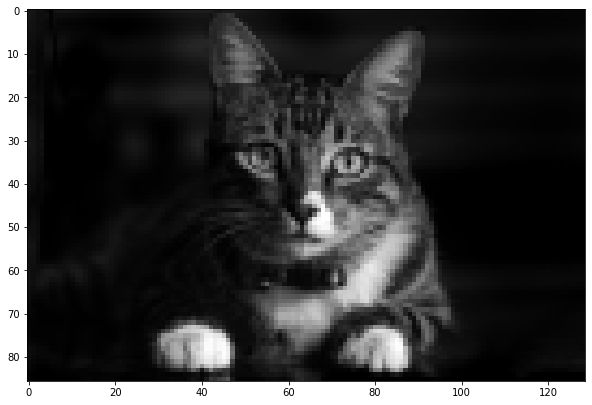

In [91]:
mean_blocks = np.mean(flattened_blocks, axis=2)

plt.figure(figsize = (10, 10))
plt.imshow(mean_blocks, interpolation='nearest', cmap='gray');

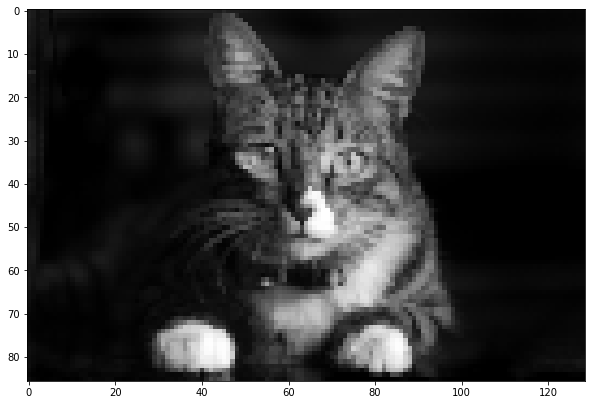

In [92]:
max_blocks = np.max(flattened_blocks, axis=2)

plt.figure(figsize = (10, 10))
plt.imshow(max_blocks, interpolation='nearest', cmap='gray');

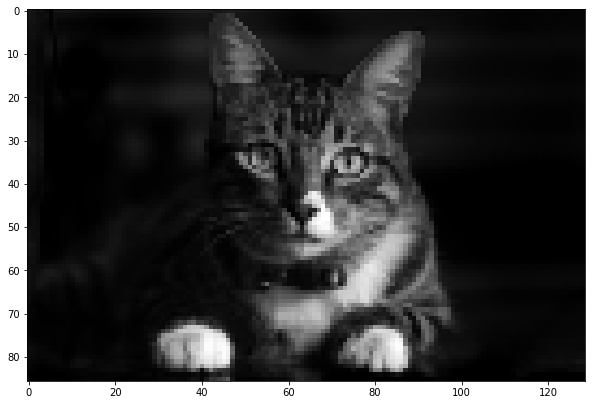

In [93]:
median_blocks = np.median(flattened_blocks, axis=2)

plt.figure(figsize = (10, 10))
plt.imshow(median_blocks, interpolation='nearest', cmap='gray');